In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

### Load the data and get means

In [96]:
file_name = "./data/full_bus_data_high_confidence.csv"

bus_data = pd.read_csv(file_name)
# drop outliers (display these later)
super_delays = bus_data[bus_data["Min Delay"]>60].dropna()
super_delays = super_delays[super_delays["Min Delay"]<1000]
bus_data = bus_data[bus_data["Min Delay"]<=60] 

mean_bus_data = bus_data.groupby(["stop_lat", "stop_lon"])[["Min Delay", "Min Gap"]].mean().reset_index()
super_means = super_delays.groupby(["stop_lat", "stop_lon"])[["Min Delay", "Min Gap"]].mean().reset_index()

display(mean_bus_data)

/var/folders/xt/5my4_t657l5dvcsk9ybkb_ww0000gn/T/ipykernel_50437/4175178420.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_data = pd.read_csv(file_name)


,stop_lat,stop_lon,Min Delay,Min Gap
0,43.592111,-79.543700,16.779683,33.163588
1,43.592468,-79.541863,15.111111,30.222222
2,43.592820,-79.541218,14.166667,25.000000
3,43.593263,-79.539318,23.400000,40.800000
4,43.593334,-79.538348,9.166667,18.166667
...,...,...,...,...
5310,43.903427,-79.294134,40.000000,80.000000
5311,43.904534,-79.267211,23.600000,47.200000
5312,43.907142,-79.277864,39.500000,79.000000
5313,43.908378,-79.273087,27.666667,55.083333


In [97]:
lat = mean_bus_data["stop_lat"]
lon = mean_bus_data["stop_lon"]
delay = mean_bus_data["Min Delay"]
super_lat = super_means["stop_lat"]
super_lon = super_means["stop_lon"]
super_delay = super_means["Min Gap"]

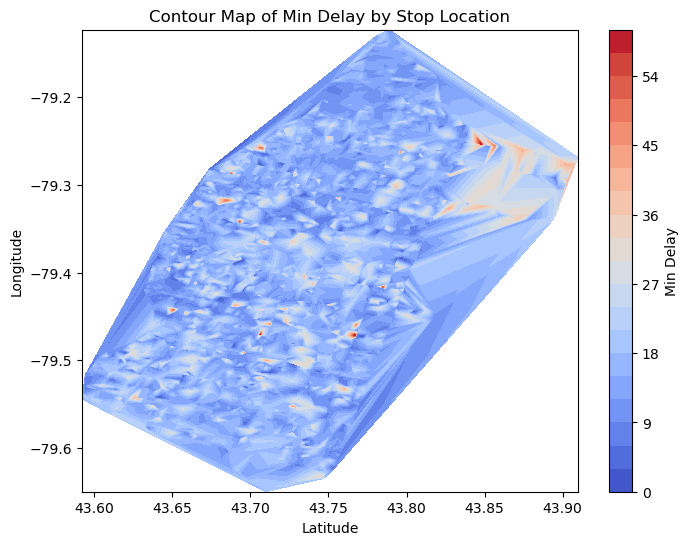

In [98]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
contour1 = ax1.tricontourf(lat, lon, delay, levels=20, cmap='coolwarm')
plt.colorbar(contour1, label="Min Delay")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Contour Map of Min Delay by Stop Location")

plt.show()

Text(0.5, 0.92, '3D Plot of Min Delay by Stop Location')

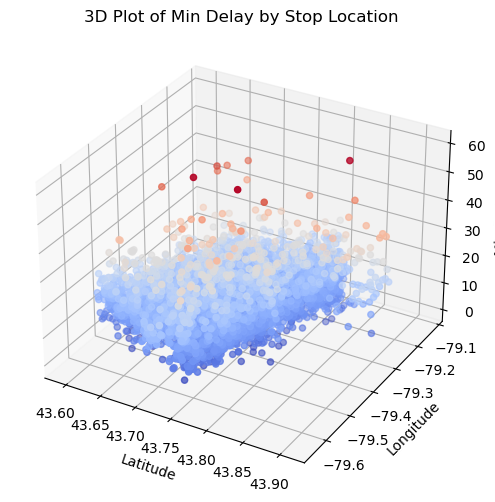

In [99]:
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(lat, lon, delay, c=delay, cmap='coolwarm', marker='o')
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_zlabel("Min Delay")
ax1.set_title("3D Plot of Min Delay by Stop Location")

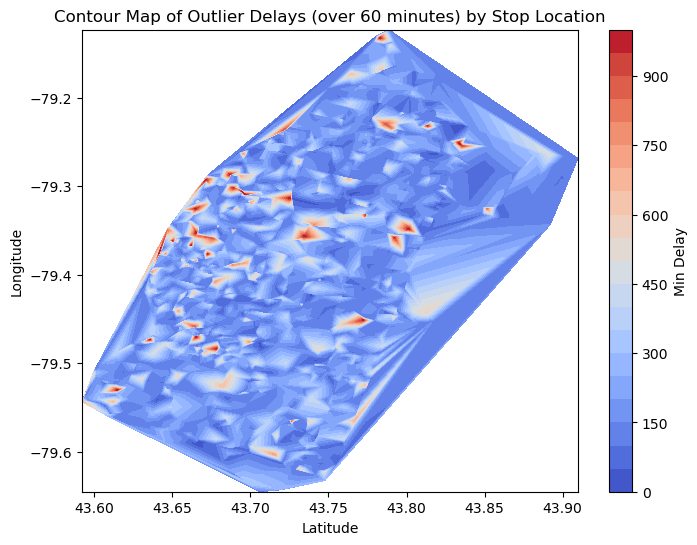

In [102]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
contour1 = ax1.tricontourf(super_lat, super_lon, super_delay, levels=20, cmap='coolwarm')
plt.colorbar(contour1, label="Min Delay")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Contour Map of Outlier Delays (over 60 minutes) by Stop Location")

plt.show()

Text(0.5, 0.92, '3D Plot of Outlier Delays (over 60 minutes) by Stop Location')

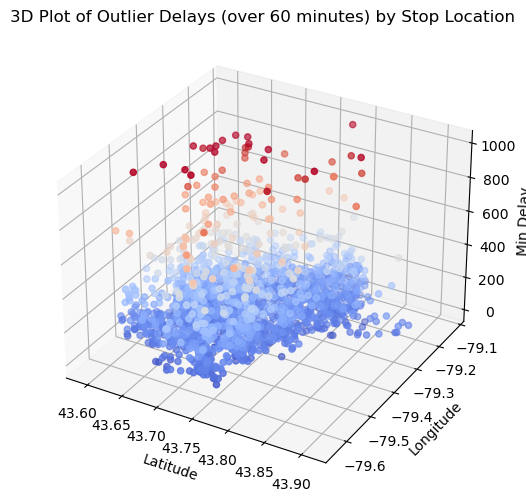

In [103]:
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(super_lat, super_lon, super_delay, c=super_delay, cmap='coolwarm', marker='o')
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_zlabel("Min Delay")
ax1.set_title("3D Plot of Outlier Delays (over 60 minutes) by Stop Location")

In [42]:
top_50_delay_stops = mean_bus_data.nlargest(50, "Min Delay")
display(top_50_delay_stops)

,stop_lat,stop_lon,Min Delay,Min Gap
92,43.614966,-79.530325,979.000000,999.000000
549,43.650318,-79.361910,960.000000,980.000000
5315,43.851566,-79.325197,816.000000,827.000000
1096,43.669650,-79.370267,770.000000,NaN
4230,43.773357,-79.334456,757.666667,770.666667
2671,43.719609,-79.314316,676.222222,682.666667
4055,43.766912,-79.412451,671.000000,687.250000
3062,43.732617,-79.341124,661.333333,319.000000
594,43.652232,-79.448522,611.636364,621.000000
3122,43.734608,-79.356821,514.500000,529.500000
